In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from statsmodels.tsa.stattools import acf

In [95]:
file="STR_ABS_AX_F_COMB_HAND_BANK.CSV"
f=500

rawData = pd.read_csv (file, header=11)
rawData

,mm,Unnamed: 1
0,-1.243801,NaN
1,-1.103403,NaN
2,-0.963179,NaN
3,-0.915872,NaN
4,-0.878541,NaN
...,...,...
618995,7.929271,NaN
618996,7.816629,NaN
618997,7.919769,NaN
618998,7.827065,NaN


In [75]:
signal = rawData["mm"].to_numpy()       
signal = scipy.signal.resample(signal,int(len(rawData)*100/f)) #100hz

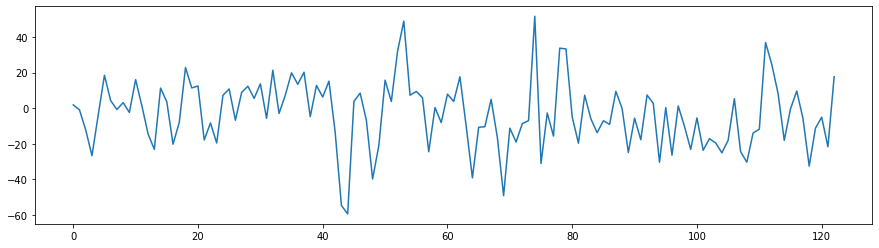

In [76]:
plt.figure(figsize=(15,4))
plt.plot(signal)

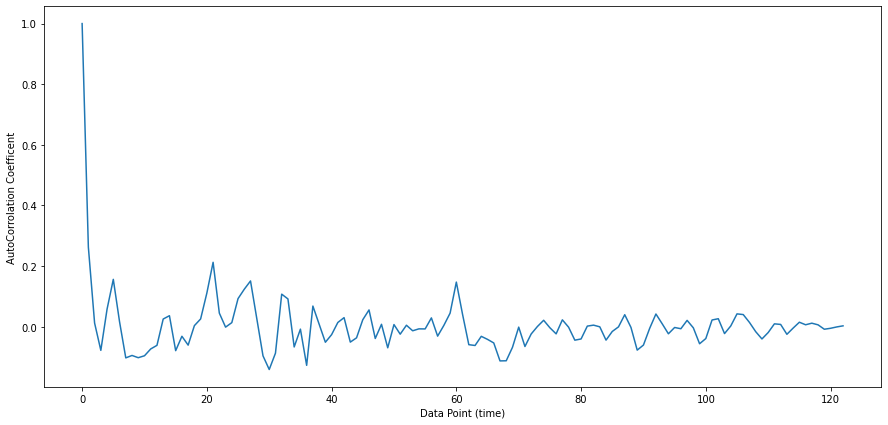

In [77]:
#Autocorrelate the signal and plot
plt.figure(figsize=(15,7))
plt.ylabel('AutoCorrolation Coefficent')
plt.xlabel('Data Point (time)')
acorr = acf(signal, nlags=(len(signal)))
plt.plot(acorr)


In [78]:
#Find peak points
peak_points = scipy.signal.find_peaks(acorr, height=0.1,prominence=0.2)


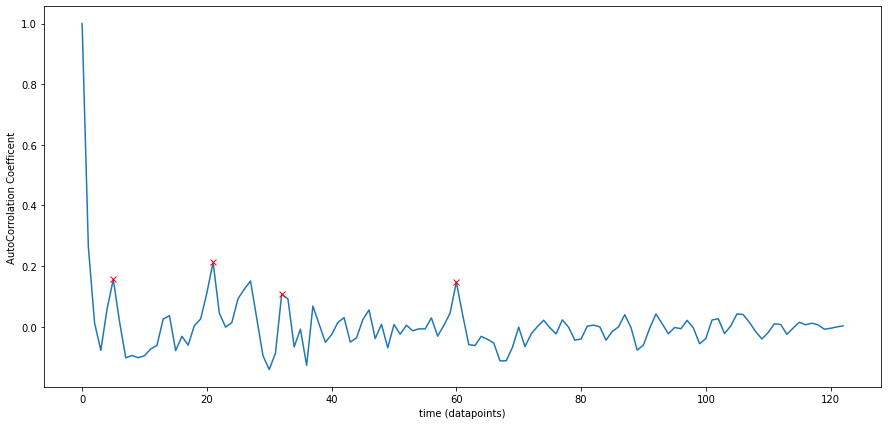

In [83]:
# peak_points 4D array, 1D = timestamp, , 2D = peak_heights, 3D = left_based, 4D = right_based,

plt.figure(figsize=(15,7))
plt.ylabel('AutoCorrolation Coefficent')
plt.xlabel('time (datapoints)')
plt.plot(acorr)
plt.plot(peak_points[0],peak_points[1]['peak_heights'],'rx') #rx = crosses

In [84]:
peaks = np.append([0],peak_points[0])
type(peaks)

numpy.ndarray

In [85]:
"""Creating the timestamps from the peaks"""
#using zip() + list slicing 
#to perform pair iteration in list
timestamps = list(zip(peaks, peaks[1:] + peaks[:1]))
print("Total cycles",len(timestamps))
# printing result
print ("The pair list is : " + str(timestamps))

Total cycles 4
The pair list is : [(0, 5), (5, 21), (21, 32), (32, 60)]


In [86]:
#Plot all cycles overlayed

cycles_plot= [] 
for a,b in zip(peaks[:-1],peaks[1:]):
    cycles_plot.append(signal[a:b])
cycles_plot # a 2D list, each element is 1 all the points in 1 cycle
print(type(cycles_plot))
print("There's", len(cycles_plot), "cycles plotted" )


<class 'list'>
There's 4 cycles plotted


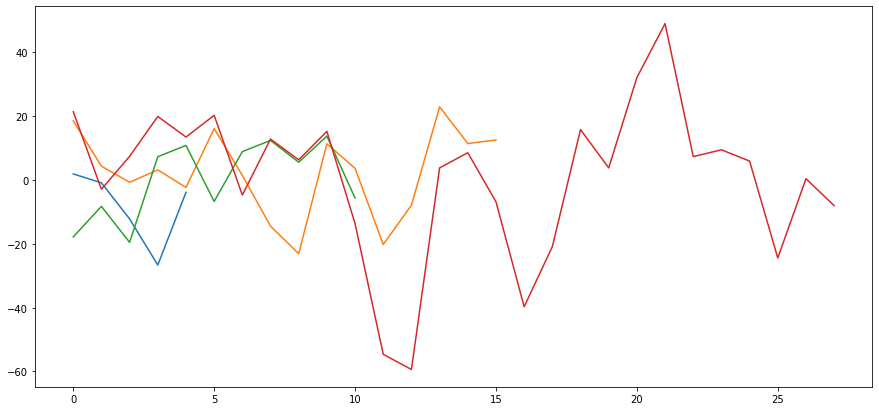

In [87]:
plt.figure(figsize=(15,7))
for cycle in cycles_plot:
    plt.plot(cycle)

In [88]:
timestamps
#d1 = cycle number, #d2 = start or end timestamp

[(0, 5), (5, 21), (21, 32), (32, 60)]

In [89]:
meanList=[]
for i in cycles_plot:

    meanList.append(np.sum(i)/len(i))
print(meanList)


[-8.354147682946088, 2.2799496914402306, 0.04901712423662092, 0.618012681718451]


0.04901712423662092
2


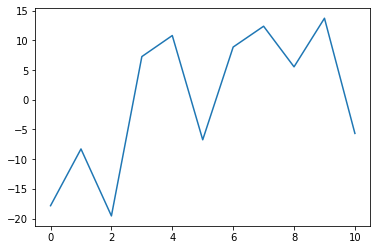

In [90]:
closest_real_value = min(meanList, key=lambda x:abs(x-np.average(meanList)))
print(closest_real_value)

closest_to_av_index = meanList.index(closest_real_value)
print(closest_to_av_index)
plt.plot(cycles_plot[closest_to_av_index])

In [92]:
listforMin=[]

for i in cycles_plot:
    listforMin.append(min(i))
    
minIndex = listforMin.index(min(listforMin))

print("min value from list is",min(listforMin))
print("for function max, cycle index is",minIndex)

min value from list is -59.39429863369805
for function max, cycle index is 3


In [93]:
listforMax=[]

for i in cycles_plot:
    listforMax.append(max(i))    
maxIndex = listforMax.index(max(listforMax))

print("max value from list is",max(listforMax))
print("for function max, cycle index is",maxIndex)

max value from list is 48.994489164191975
for function max, cycle index is 3


In [94]:
np.savetxt(file.split(".")[0]+"_CYCLE_SELECTED.CSV", (cycles_plot[closest_to_av_index]) ,delimiter=',')
